# Laboratorium 5 - Całkowanie

Konrad Dębiec

## Zadanie 1

### Wielomiany Legendre'a

In [145]:
using Polynomials

In [146]:
function WielomianLegendre(stopien)
    if stopien == 0
        return Poly([1])
    end
    
    x = Poly([0,1])
    
    if stopien == 1
        return x
    end
    
    return (2*(stopien-1)+1)/(stopien)*x*WielomianLegendre(stopien-1) - (stopien-1)/stopien*WielomianLegendre(stopien-2)
end

WielomianLegendre (generic function with 1 method)

### Wykres w przedziale (-1,1)

In [147]:
using Plots
using QuadGK

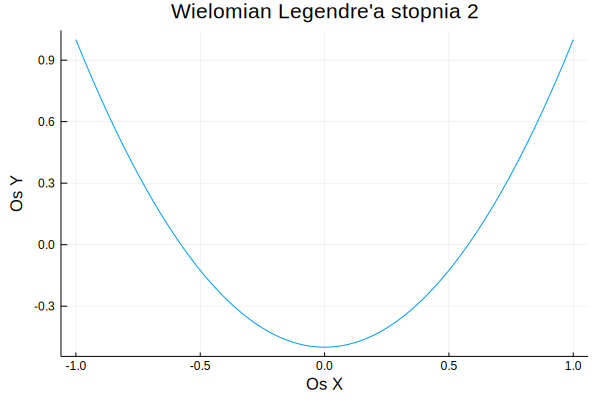

In [148]:
xaxis = -1:0.01:1
plot(xaxis, [WielomianLegendre(2)(x) for x in xaxis], title="Wielomian Legendre'a stopnia 2", xaxis="Os X", yaxis="Os Y", label="")

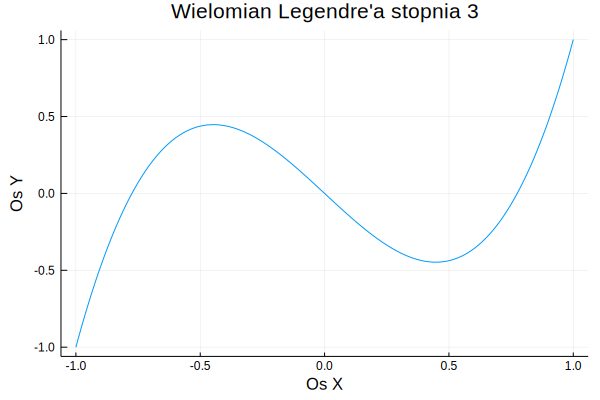

In [149]:
plot(xaxis, [WielomianLegendre(3)(x) for x in xaxis], title="Wielomian Legendre'a stopnia 3", xaxis="Os X", yaxis="Os Y", label="")

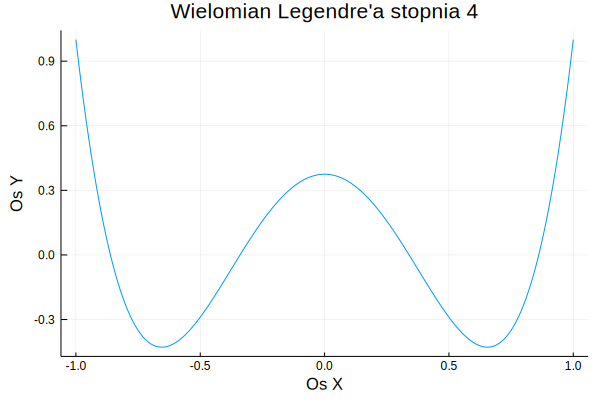

In [150]:
plot(xaxis, [WielomianLegendre(4)(x) for x in xaxis], title="Wielomian Legendre'a stopnia 4", xaxis="Os X", yaxis="Os Y", label="")

### Porównanie odciętych punktów Gaussa z miejscami zerowymi

In [151]:
function Test(stopien)
    miejscaZerowe = [round.(x, digits=15) for x in roots(WielomianLegendre(2))]
    odcietePunktowGaussa = [round.(x, digits=15) for x in gauss(Float64, 2)[1]]
    
    if miejscaZerowe == odcietePunktowGaussa
        println("Punkty są takie same")
    else
        println("Punkty się różnią")
    end
end

Test (generic function with 1 method)

In [152]:
# Test dla wielomianu 2 stopnia
Test(2)

Punkty są takie same


In [153]:
# Test dla wielomianu 3 stopnia
Test(3)

Punkty są takie same


In [154]:
# Test dla wielomianu 2 stopnia
Test(4)

Punkty są takie same


### Wniosek

Miejsca zerowe oraz odcięte punktów Gaussa są takie same. Z podstawowego twierdzenia kwadratur Gaussa można wywnioskować, że miejsca zerowe wielomianu stopnia n są odciętymi n-punktowej kwadratury.

## Zadanie 2

### Funkcja licząca $\int_{-1}^{1} f dx$ 

In [155]:
function Calk(f, k)
    xp, a = gauss(Float64,k)
    return sum(a .* f.(xp))
end

Calk (generic function with 1 method)

### Test funkcji oraz sprawdzanie dokładności

In [156]:
using FastGaussQuadrature
using LinearAlgebra

Wynik porównuję z wynikiem całki również metodą kwadratury Gaussa z pakietu FastGaussQuadrature, w które ilość punktów Gaussa jest równa stopniowi wielomianu

In [157]:
function testAccuracy(k, stopien)
    print("Dla stopnia: ")
    println(stopien)
    result = round(Calk(WielomianLegendre(stopien), k), digits = 20)
    println("Wynik całkowania własną funkcją: ")
    println(result)
    
    nodes, weights = gausslegendre(stopien);
    result2 = dot( weights, [WielomianLegendre(stopien)(x) for x in nodes])
    println("Wynik całkowania z pakietu FastGaussQuadrature: ")
    println(round(result2, digits = 20))
end

testAccuracy (generic function with 1 method)

In [158]:
println("Dla 4 punktów Gaussa")
println("##################################################")
for s in 2:6
    testAccuracy(4,s)
    println("--------------------------------------------")
end

Dla 4 punktów Gaussa
##################################################
Dla stopnia: 2
Wynik całkowania własną funkcją: 
2.7756e-16
Wynik całkowania z pakietu FastGaussQuadrature: 
2.2204e-16
--------------------------------------------
Dla stopnia: 3
Wynik całkowania własną funkcją: 
0.0
Wynik całkowania z pakietu FastGaussQuadrature: 
0.0
--------------------------------------------
Dla stopnia: 4
Wynik całkowania własną funkcją: 
-1.8826e-16
Wynik całkowania z pakietu FastGaussQuadrature: 
-1.8826e-16
--------------------------------------------
Dla stopnia: 5
Wynik całkowania własną funkcją: 
1.388e-17
Wynik całkowania z pakietu FastGaussQuadrature: 
0.0
--------------------------------------------
Dla stopnia: 6
Wynik całkowania własną funkcją: 
1.44329e-15
Wynik całkowania z pakietu FastGaussQuadrature: 
1.8622e-15
--------------------------------------------


### Wniosek

Zgodnie z twierdzeniem o dokładności stopnia wielomianu kwadratury Gaussa, jest ona dokładna dla stopnia wielomianu co najwyżej 2k-1

## Zadanie 3

### Funkcja licząca $\int_{-b}^{a} f dx$ 

In [159]:
function uniCalk(f, k, a, b)
    xp, r = gauss(Float64,k)
    return round((b-a)/2 * sum(r .* f.((b-a)/2 .* xp .+ (b+a)/2)), digits=6)
end

uniCalk (generic function with 1 method)

#### Przykład 1

In [160]:
uniCalk(sin, 100, 0, 1)

0.459698

Analitycznie dostajemy -cos(1) + 1, co daje ~0.45969

#### Przykład 2

In [161]:
uniCalk(x -> 3x^3+2x^2, 100, 0, 5)

552.083333

Analitycznie dostajemy 6625/12, czyli 552,08333...

#### Przykład 3

In [162]:
uniCalk(log, 100, 0, 2)

-0.613581

Analitycznie dostajemy 2ln(2) - 2, czyli ~-0.61370

## Zadanie 4

In [163]:
using QuadGK

### Całkowanie wielomianu Legendre stopnia 3

In [164]:
quadgk(WielomianLegendre(3), -1, 1)[1]

-8.72125759873829e-17

###  $\int_{-\inf}^{\inf} \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2}) dx$ 

In [168]:
quadgk(x -> 1/sqrt(2*pi)*exp(-x^2/2), -Inf, Inf)

(1.0000000000032583, 1.4395584941504537e-8)

## Zadanie 5


In [175]:
function Riemann(f,a,b,n)
    c=(b-a)/n
    return round(sum(f.(a.+[1:n...]c))c, digits=5)
end

Riemann (generic function with 3 methods)

#### Wykres funkcji błędu całkowania $ 2^x $ na przedziale [0, 1]

Analitycznie wynikiem jest $ 1/ln(2) $, czyli ~1.44269

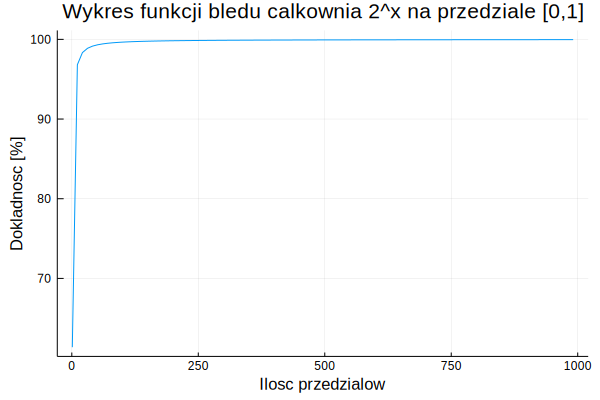

In [176]:
analyticResult = 1.44269

xaxis = 1:10:1000
errors = [(1-abs((analyticResult 
                - Riemann(x -> 2^x, 0, 1, x))/analyticResult))*100 
    for x in xaxis]
plot(points, 
    errors,
    title="Wykres funkcji bledu calkownia 2^x na przedziale [0,1]",
    xaxis="Ilosc przedzialow", 
    yaxis="Dokladnosc [%]", 
    label="")

#### Wykres funkcji błędu całkownia sin(x) na przedziale $ [0, 1] $

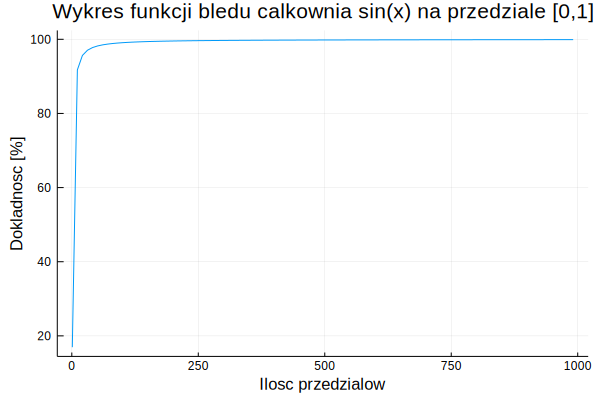

In [177]:
analyticResult = 0.45969

xaxis = 1:10:1000
errors = [(1-abs((analyticResult 
                - Riemann(sin, 0, 1, x))/analyticResult))*100 
    for x in xaxis]
plot(points, 
    errors,
    title="Wykres funkcji bledu calkownia sin(x) na przedziale [0,1]",
    xaxis="Ilosc przedzialow", 
    yaxis="Dokladnosc [%]", 
    label="")